## Figure 3: Human Group Results

This notebook presents group-level analyses of place cell properties in human subjects. It includes:
- Percentage of place cells identified by different statistical methods
- Comparison of place cell detection across brain regions
- The relationship between detection metric and significance classification


In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from convnwb.io import get_files, load_jsons_to_df
from scipy.stats import binom_test
from spiketools.plts.annotate import add_vlines
from spiketools.plts.utils import make_grid, get_grid_subplot, save_figure
from spiketools.plts.style import drop_spines
from spiketools.utils.run import create_methods_list


In [16]:
import seaborn as sns
sns.set_context('talk', font_scale=0.9)

In [31]:
import sys
sys.path.append('../code')
from reports import get_significant_percentage,get_agreement_percentage
from plts import plot_percentages

sys.path.append('../scripts')
from settings import PATHS, METHODS, EXCLUSION,INCREMENT

from pldm_settings import PLOT_PARAMS,SI_THRESHOLD,ALPHA












## Load Group Data

In [32]:
results_folder = PATHS['RESULTS'] / 'units'
reports_folder = PATHS['REPORTS'] / 'units'

locations_folder = PATHS['BASE'] / 'localization'/'Loc'
jacksheet_folder = PATHS['BASE'] / 'localization'/'jacksheet'
locations_files = get_files(locations_folder, select='session_data')
locations_files

['session_data.json']

In [33]:
Locations = load_jsons_to_df(locations_files, folder=locations_folder)


In [34]:
res_files = get_files(results_folder, select='mat')

In [35]:
all_results = load_jsons_to_df(res_files, folder=results_folder)

## Evaluate Significant Cells

In [36]:
# Get total number of units
n_units = len(all_results)
print('Total number of cells: {}'.format(n_units))
# Collect numbers of significant cells
analyses = create_methods_list(METHODS)
# Statistics settings
alpha_level = 0.05
binom_sidedness = 'greater'   
results = {}
for analysis in analyses:
    all_results[f'is_{analysis}'] = (all_results[f'{analysis}_surr_p_val'] < alpha_level).values

for analysis in analyses:
     results[analysis] = sum(all_results['is_' + analysis])


# Compute significance of the counts of detected neurons
stats = {}
for analysis in analyses:
    stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)

Total number of cells: 390


/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_19487/901725631.py:20: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  stats[analysis] = binom_test(results[analysis], n_units, alpha_level, binom_sidedness)


In [37]:
print('total cells: {}\n'.format( n_units))
for analysis in analyses:
    print('# {} cells:     \t\t{:3d}  ({:5.2f}%) \t\t {:.4f}'.format(\
        analysis, results[analysis], results[analysis] / n_units * 100, stats[analysis]))

total cells: 390

# place_anova cells:     		 85  (21.79%) 		 0.0000
# place_info cells:     		 84  (21.54%) 		 0.0000
# place_fr_anova cells:     		 54  (13.85%) 		 0.0000
# place_fr_info cells:     		 63  (16.15%) 		 0.0000


## Get Anatomical Locations

In [38]:
spike_names = all_results['spike_name']
labels = all_results['label']

In [39]:
all_results['channel'] = spike_names.str.extract(r'(?:NSX|CSC)(\d+)')[0].str.lstrip('0')
all_results['sessions'] = all_results['session_id'].str.extract(r'(\w+)_(\d+)_train_events.mat')[0] + '_' + all_results['session_id'].str.extract(r'(\w+)_(\d+)_train_events.mat')[1]


In [40]:
all_results['location'] = None
for i in range(len(all_results['session_id'])):
    session_id = all_results['sessions'][i]
    channel = int(all_results['channel'][i])
    if session_id in Locations:
        
        if channel in Locations[session_id][0]['LFPChan']:
            # get the index of the channel in the LFPChan list
            channel_idx = Locations[session_id][0]['LFPChan'].index(channel)
            all_results['location'][i] = Locations[session_id][0]['LFPArea'][channel_idx]
            print(f"Location: {all_results['location'][i]}")
        else:
            all_results['location'][i] = None
    else:
        all_results['location'][i] = None

Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: RCA1_2
Location: RCA1_2
Location: RCA1_3
Location: RCA1_3
Location: RCA1_5
Location: RCA1_5
Location: RCA1_11
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_2
Location: LA_3
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_4
Location: LA_5
Location: LA_5
Location: LA_5
Location: LA_5
Location: LA_6
Location: LA_7
Location: LA_7
Location: LA_7
Location: LA_7
Location: LA_8
Location: LSB_2
Location: LSB_2
Location: LSB_2
Location: LSB_5
Location: LA_2
Location: LA_2
Location: LA_3
Location: LA_5
Location: LA_5
Location: LA_6
Location: LA_7
Location: LA_8
Location: LA_9
Location: LA_12
Location: LA_12
Location: LA_16
Location: LCA1_5
Location: LA_2
Location: LA_5
Location: LA_6
Location: LA_8
Location: LA_11
Location: LA_12
Location: LA_12
Location: LA_12
Location: LA_12
Location: LA_14
Location: LA_16
Location: LA_6
Location: LA_6
Location: LA_8
Location:

/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_19487/2921698974.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['location'][i] = None
/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_19487/2921698974.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_results['location'][i] = Locations[session_id][0]['LFPArea'][channel_idx]
/var/folders/tx/9bxcz_2j6m79n4dmyyw6s2zm0000gn/T/ipykernel_19487/2921698974.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

### Clean Locations

In [41]:
all_results['location_clean'] = all_results['location'].str.replace(r'^[LR]|_\d+$', '', regex=True)
all_results['presence_ratio'] = all_results['trial_fr'].apply(lambda x: np.mean([np.any(np.array(trial) > 0) for trial in x]))
# Reorder hippocampal areas together and combine cingulate areas
anatomy_counts = all_results['location_clean'].value_counts()
hippo_areas = ['CA1', 'PHG','SB','DG']  # Only CA1 and PHG
cingulate_areas = ['MC', 'AC']  # Cingulate areas to combine
hippo_counts = anatomy_counts[anatomy_counts.index.isin(hippo_areas)].sum()  # Sum CA1 and PHG counts
cingulate_counts = anatomy_counts[anatomy_counts.index.isin(cingulate_areas)].sum()  # Sum cingulate counts
other_counts = anatomy_counts[~anatomy_counts.index.isin(hippo_areas + cingulate_areas)]
# Create a new Series with the combined counts
anatomy_counts = pd.concat([
    pd.Series({'Hippocampus': hippo_counts, 'Cingulate': cingulate_counts}), 
    other_counts
])

# Calculate total number of cells with valid anatomy 
total_cells = anatomy_counts[~anatomy_counts.index.isna()].sum()
print(f"Total number of cells with valid anatomical locations: {total_cells}")

# Display the counts
print("\nAnatomical Location Counts:")
print("-" * 30)
for location, count in anatomy_counts.items():
    if pd.notna(location):
        print(f"{location}: {int(count)}")

Total number of cells with valid anatomical locations: 354

Anatomical Location Counts:
------------------------------
Hippocampus: 99
Cingulate: 39
EC: 124
A: 79
WM: 10
CS: 3


## Apply Exclusion Criteria 

In [42]:
EXCLUSION

{'RATE_MAX': 20,
 'RATE_MIN': 0.15,
 'N_SPIKES': 50,
 'N_TRIAL': 15,
 'TOTAL_PRESENCE_RATIO': 0.1}

In [43]:
from copy import deepcopy

# Display the original dataframe before filtering
print("Original dataframe shape:", all_results.shape)
print(all_results.columns)
all_results['firing_rate'] = all_results['place_bins'].apply(lambda x: np.mean(x))
all_results['presence_ratio'] = all_results['trial_fr'].apply(lambda x: np.mean([np.any(np.array(trial) > 0) for trial in x]))
# Create a filtered copy
results = deepcopy(all_results)

results = results[results['firing_rate'].astype(float) < EXCLUSION['RATE_MAX']]
results = results[results['firing_rate'].astype(float) > EXCLUSION['RATE_MIN']]
results = results[results['presence_ratio'].astype(float) > EXCLUSION['TOTAL_PRESENCE_RATIO']]
# Display the filtered dataframe
print("\nFiltered dataframe shape:", results.shape)

Original dataframe shape: (390, 35)
Index(['unit_ind', 'session_id', 'label', 'spike_name', 'place_bins',
       'spike_position', 'trial_changes', 'trial_Num', 'trial_place_bins',
       'place_sem', 'trial_fr', 'fr_bins', 'fr_sem', 's_bins', 'place_info',
       'place_fr_info', 'place_anova', 'place_fr_anova',
       'place_anova_surr_p_val', 'place_anova_surr_z_score',
       'place_info_surr_p_val', 'place_info_surr_z_score',
       'place_fr_anova_surr_p_val', 'place_fr_anova_surr_z_score',
       'place_fr_info_surr_p_val', 'place_fr_info_surr_z_score',
       'is_place_anova', 'is_place_info', 'is_place_fr_anova',
       'is_place_fr_info', 'channel', 'sessions', 'location', 'location_clean',
       'presence_ratio'],
      dtype='object')

Filtered dataframe shape: (285, 36)


In [44]:
results['location_clean'] = results['location_clean'].replace(['CA1', 'PHG','SB','DG'], 'H')
results['location_clean'] = results['location_clean'].replace(['MC', 'AC'], 'C')
# Drop WM (white matter) from the dataset
results = results[results['location_clean'] != 'WM']


### Figure 3 a and b Plot Region Significance

In [49]:
# Calculate region-wise counts and percentages
region_sig_info = results[results['place_fr_info_surr_p_val'] < ALPHA].groupby('location_clean')['unit_ind'].count()
region_sig_anova = results[results['place_fr_anova_surr_p_val'] < ALPHA].groupby('location_clean')['unit_ind'].count()
region_sig_info_threshold = results[results['place_fr_info'] > SI_THRESHOLD].groupby('location_clean')['unit_ind'].count()
region_total_info = results.groupby('location_clean')['unit_ind'].count()

# Calculate percentages for each metric
region_info_pct = (region_sig_info / region_total_info * 100).round(2)
region_anova_pct = (region_sig_anova / region_total_info * 100).round(2)
region_info_threshold_pct = (region_sig_info_threshold / region_total_info * 100).round(2)

# Calculate total percentages across all regions
total_info = len(results[results['place_fr_info_surr_p_val'] < ALPHA]) / len(results) * 100
total_anova = len(results[results['place_fr_anova_surr_p_val'] < ALPHA]) / len(results) * 100
total_threshold = len(results[results['place_fr_info'] > SI_THRESHOLD]) / len(results) * 100

# Add totals to the region percentages
region_info_pct['Total'] = total_info
region_anova_pct['Total'] = total_anova
region_info_threshold_pct['Total'] = total_threshold

# Order regions consistently
desired_order = ['Total', 'H', 'A', 'EC', 'C']
region_info_pct_ordered = region_info_pct.reindex(desired_order)
region_anova_pct_ordered = region_anova_pct.reindex(desired_order)
region_info_threshold_pct_ordered = region_info_threshold_pct.reindex(desired_order)

# Setup plotting parameters
x = np.arange(len(desired_order))
width = 0.8



In [51]:
place_info = results['place_fr_info']

place_anova = results['place_fr_anova']

place_info_surr_p_val = results['place_fr_info_surr_p_val']

place_anova_surr_p_val = results['place_fr_anova_surr_p_val']

In [52]:
total_cells = len(results)


## SI permutation vs. ANOVA permutation

In [53]:
both_significant = np.sum((place_anova_surr_p_val < ALPHA) & (place_info_surr_p_val < ALPHA))
both_significant_pct = (both_significant / total_cells) * 100

anova_significant = np.sum((place_anova_surr_p_val < ALPHA) & ~(place_info_surr_p_val < ALPHA))
anova_significant_pct = (anova_significant / total_cells) * 100

info_significant = np.sum(~(place_anova_surr_p_val < ALPHA) & (place_info_surr_p_val < ALPHA))
info_significant_pct = (info_significant / total_cells) * 100

both_not_significant = np.sum(~(place_anova_surr_p_val < ALPHA) & ~(place_info_surr_p_val < ALPHA))
both_not_significant_pct = (both_not_significant / total_cells) * 100

data = np.array([
    [anova_significant_pct, both_not_significant_pct],
    [both_significant_pct, info_significant_pct]
])

SI_permutation_v_ANOVA_permutation_df = pd.DataFrame(data, index=['N.S.', '*'],
                  columns=['*', 'N.S.'])

anova_significant = anova_significant_pct+both_significant_pct
info_significant = info_significant_pct+both_significant_pct

print('anova_significant: ', anova_significant)
print('info_significant: ', info_significant)



anova_significant:  15.162454873646208
info_significant:  16.606498194945846


## SI Threshold  Vs. ANOVA Permutation

In [54]:
both_significant = np.sum((place_anova_surr_p_val < ALPHA) & (place_info > SI_THRESHOLD))
both_significant_pct = (both_significant / total_cells) * 100

anova_significant = np.sum((place_anova_surr_p_val < ALPHA) & ~(place_info > SI_THRESHOLD))
anova_significant_pct = (anova_significant / total_cells) * 100

info_significant = np.sum(~(place_anova_surr_p_val < ALPHA) & (place_info > SI_THRESHOLD))
info_significant_pct = (info_significant / total_cells) * 100

both_not_significant = np.sum(~(place_anova_surr_p_val < ALPHA) & ~(place_info > SI_THRESHOLD))
both_not_significant_pct = (both_not_significant / total_cells) * 100

data = np.array([
    [anova_significant_pct, both_not_significant_pct],
    [both_significant_pct, info_significant_pct]
])

SI_threshold_v_ANOVA_permutation_df = pd.DataFrame(data, index=['N.S.', '*'],
                  columns=['*', 'N.S.'])

anova_significant = anova_significant_pct+both_significant_pct
info_significant = info_significant_pct+both_significant_pct

print('anova_significant: ', anova_significant)
print('info_significant: ', info_significant)


anova_significant:  15.16245487364621
info_significant:  10.469314079422382


## SI Threshold  Vs. SI Permutation

In [55]:
both_significant = np.sum((place_info_surr_p_val < ALPHA) & (place_info > SI_THRESHOLD))
both_significant_pct = (both_significant / total_cells) * 100

info_significant = np.sum((place_info_surr_p_val < ALPHA) & ~(place_info > SI_THRESHOLD))
info_significant_pct = (info_significant / total_cells) * 100

info_threshold = np.sum(~(place_info_surr_p_val < ALPHA) & (place_info > SI_THRESHOLD))
info_threshold_pct = (info_threshold / total_cells) * 100

both_not_significant = np.sum(~(place_info_surr_p_val < ALPHA) & ~(place_info > SI_THRESHOLD))
both_not_significant_pct = (both_not_significant / total_cells) * 100

data = np.array([
    [info_significant_pct, both_not_significant_pct],
    [both_significant_pct, info_threshold_pct]
])

SI_threshold_v_SI_permutation_df = pd.DataFrame(data, index=['N.S.', '*'],
                  columns=['*', 'N.S.'])

info_significant_pct_significant = info_significant_pct+both_significant_pct
info_threshold_pct_significant = info_threshold_pct+both_significant_pct

print('info_significant: ', info_significant_pct_significant)
print('info_threshold: ', info_threshold_pct_significant)

info_significant:  16.60649819494585
info_threshold:  10.469314079422382


In [56]:
info_increment = INCREMENT['INFO']
anova_increment = INCREMENT['ANOVA']

info_steps, info_significant_percentages = get_significant_percentage(results['place_fr_info'].values,results['place_fr_info_surr_p_val'].values,increment=info_increment)
anova_steps, anova_significant_percentages = get_significant_percentage(results['place_fr_anova'].values,results['place_fr_anova_surr_p_val'].values,increment=anova_increment)
info_categories, info_agreement_percentages, _, _ = get_agreement_percentage(results['place_fr_info'].values,results['place_fr_info_surr_p_val'].values,results['place_fr_anova_surr_p_val'].values,increment=info_increment)
anova_categories, anova_agreement_percentages, _, _= get_agreement_percentage(results['place_fr_anova'].values,results['place_fr_anova_surr_p_val'].values,results['place_fr_info_surr_p_val'].values,increment=anova_increment)


anova_color = '#7f94c0'
info_color = '#c78e8e'
threshold_color = 'black'
lw = 7


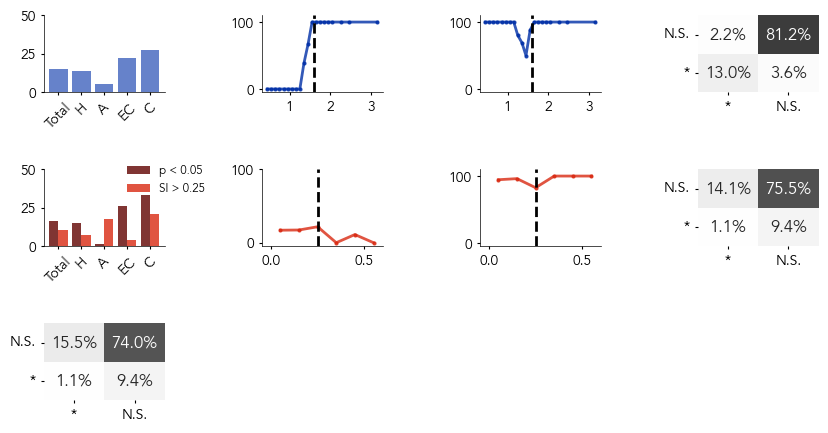

In [58]:
# Make grid for plotting
lw = 2
# Define consistent colors
anova_color = '#002FA7'  # Deep blue for ANOVA
info_color = '#D92911'   # Deep red for Spatial Info
si_perm_color = '#610200'  # Black for threshold lines
si_thresh_color = '#D92911'
threshold_color = '#000000'  # Black for threshold lines

grid = make_grid(3, 4, wspace=.8, hspace=1, figsize=(10, 5),
                 )

plt.rcParams.update(PLOT_PARAMS)



ax = get_grid_subplot(grid, 2, 0)
heatmap = sns.heatmap(SI_threshold_v_SI_permutation_df, annot=True, fmt='.1f', cmap='Greys', vmin=0, vmax=100, ax=ax, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
# heatmap.set_xlabel('SI (Permutation)')
# heatmap.set_ylabel('SI (Threshold)')
for t in heatmap.texts:
    t.set_text(t.get_text() + '%')


x = np.arange(len(desired_order))
width = 0.8
ax=get_grid_subplot(grid,1, 0)
ax.bar(x - width/4, region_info_pct_ordered, width/2, label='p < 0.05', color=si_perm_color, alpha=0.8)
ax.bar(x + width/4, region_info_threshold_pct_ordered, width/2, label='SI > 0.25', color=si_thresh_color, alpha=0.8)
#ax.set_ylabel('Significant %')
ax.set_xticks(x)
ax.set_xticklabels(desired_order, rotation=45)
ax.set_xlabel(' ')
#ax.set_title('Spatial Information')
ax.set_ylim(0, 50)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(bbox_to_anchor=(0.6, 1.2), loc='upper left', fontsize='x-small', frameon=False)




ax=get_grid_subplot(grid,0, 0)

# Plot for ANOVA
ax.bar(x, region_anova_pct_ordered, width, label='ANOVA', color=anova_color, alpha=0.6)

#ax.set_ylabel('Significant %')
ax.set_xticks(x)
ax.set_xticklabels(desired_order, rotation=45)
ax.set_xlabel(' ')
# ax.set_title('ANOVA')
ax.set_ylim(0, 50)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax = get_grid_subplot(grid, 0, 1)
plot_percentages(anova_steps, anova_significant_percentages, 
                 ylim=[-5,110],
                # ylabel='Significant %',
                # xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.6, color=threshold_color, linestyle='--',alpha=1, lw=lw, label='F = 1.6')
#ax.legend(frameon=False, loc='lower right', bbox_to_anchor=(1.2, 0.05))

drop_spines(['top','right'])

# ANOVA Agreement Plot  
ax = get_grid_subplot(grid, 0, 2)
plot_percentages(anova_steps, anova_agreement_percentages,
                 ylim=[-5,110],
                # ylabel='Agreement %', 
                # xlabel='ANOVA F Statistic',
                color=anova_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(1.6, color=threshold_color, linestyle='--', lw=lw, alpha=1, label='F = 1.6')
#ax.legend(frameon=False, loc='lower right', bbox_to_anchor=(1.2, 0.05))

drop_spines(['top','right'])

# Spatial Information Significance Plot
ax = get_grid_subplot(grid, 1, 1)
plot_percentages(info_steps, info_significant_percentages,
                 xlim=[-0.05,0.6],
                 ylim=[-5,100],
                # ylabel='Significant%',
                # xlabel='Spatial Information',
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw,  alpha=1, label='SI = 0.25')
#ax.legend(frameon=False, loc='lower right', bbox_to_anchor=(1.4, 0.1))

drop_spines(['top','right'])


ax = get_grid_subplot(grid, 1, 2)
plot_percentages(info_steps, info_agreement_percentages,
                xlim=[-0.05,0.6],
                ylim=[-5,110],
                # ylabel='Agreement %',
                # xlabel='Spatial Information', 
                color=info_color, lw=lw, alpha=0.8, ax=ax)
add_vlines(0.25, color=threshold_color, linestyle='--', lw=lw, alpha=1, label='SI = 0.25')
#ax.legend(frameon=False, loc='lower right', bbox_to_anchor=(1.4, 0.1))
drop_spines(['top','right'])

# Plotting the heatmap
ax = get_grid_subplot(grid, 0, 3)
heatmap = sns.heatmap(SI_permutation_v_ANOVA_permutation_df, annot=True, fmt='.1f', cmap='Greys', vmin=0, vmax=100, ax=ax, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
# heatmap.set_xlabel('ANOVA')
# heatmap.set_ylabel('SI (Permutation)')
for t in heatmap.texts:
    t.set_text(t.get_text() + '%')

ax = get_grid_subplot(grid, 1, 3)
heatmap = sns.heatmap(SI_threshold_v_ANOVA_permutation_df, annot=True, fmt='.1f', cmap='Greys', vmin=0, vmax=100, ax=ax, cbar=False)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
# heatmap.set_xlabel('ANOVA')
# heatmap.set_ylabel('SI (Threshold)')
for t in heatmap.texts:
    t.set_text(t.get_text() + '%')

save_figure('Figure_Human_Group.pdf',file_path='/Users/weijiazhang/Plots/PLDM/Human')